## Performance Measures of a Portfolio

You have a portfolio with the following 3 stocks: Apple (30%), Microsoft (30%) and Google (40%). Calculate different portfolio measures to analyse the portfolio.

In [1]:
# Libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the data
portfolio = pd.read_csv("stock.csv")
portfolio = portfolio.set_index('date')
portfolio.head()

,AAPL,MSFT,GOOG
date,,,
2015-12-03,28.799999,49.5887,752.54
2015-12-04,29.757500,51.1532,766.81
2015-12-07,29.570000,51.0617,763.25
2015-12-08,29.557501,51.0434,762.37
2015-12-09,28.905001,50.3024,751.61


In [3]:
# Initial weight for each stock in order
stocks = ['AAPL','MSFT','GOOG']
initial_weight = np.array([0.30, 0.30, 0.40])

<br>

### Daily return from each stock

Daily return is the percentage change in the price of the stock from the previous day. This can be calculated using the percentage change in the price on a daily basis.

In [4]:
# Daily return from each stock 
return_stocks = portfolio.pct_change()
return_stocks.head(5)

,AAPL,MSFT,GOOG
date,,,
2015-12-03,NaN,NaN,NaN
2015-12-04,0.033247,0.031550,0.018962
2015-12-07,-0.006301,-0.001789,-0.004643
2015-12-08,-0.000423,-0.000358,-0.001153
2015-12-09,-0.022076,-0.014517,-0.014114


Question: Which of the following dates shows the maximum drop for Google?

In [ ]:
# Answer here


Question: Which of the following stocks is the most risky among the three?

In [ ]:
# Answer here


### Average daily return from each stock

Average daily return for each stock can be calculated using the dataframe created above - "return_stocks"

In [7]:
# Average daily return from each stock
daily_returns_mean = return_stocks.mean()
print(daily_returns_mean)

AAPL    0.000749
MSFT    0.001211
GOOG    0.000533
dtype: float64


Microsoft seems to be the best performer.

### Total Portfolio Return

Question: Use the initial weights to determine the total return from the portfolio in the given period.

In [8]:
# Answer here
# Total Portfolio Return - Store the reults in "portfolio_return"


0.0008012479832281932


### Daily return from the portfolio

The weighted average can be calculated to determine the return from the portfolio on a daily basis.

In [9]:
# Portfolio daily returns
return_stocks['Portfolio_Daily_Return'] = return_stocks.dot(initial_weight)
return_stocks.tail(5)

,AAPL,MSFT,GOOG,Portfolio_Daily_Return
date,,,,
2019-06-26,0.021629,0.003747,-0.006029,0.005201
2019-06-27,-0.000300,0.001643,-0.003510,-0.001001
2019-06-28,-0.009112,-0.001416,0.004554,-0.001337
2019-07-01,0.018341,0.012840,0.015764,0.015660
2019-07-02,0.005855,0.006633,0.012113,0.008592


<AxesSubplot:xlabel='date'>

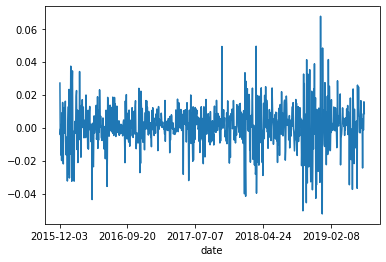

In [10]:
# Plot
return_stocks['Portfolio_Daily_Return'].plot()

- As seen in the plot, the portfolio shows larger variation in prices from 2018 to 2019. 
- Another important point to note is that minimum drop in the daily return is less than 0.5. You can compare this with the value obtained in the question above to check if the variation in portfolio has decreased or not.

### Cumulative return from the Portfolio

Cumulative return of an investment is the cumulative gain or loss from an investment over the given period of time.
You can read about the cumprod() function here: https://www.geeksforgeeks.org/python-pandas-dataframe-cumprod/

In [11]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+return_stocks).cumprod()
Cumulative_returns_daily.tail(5)

,AAPL,MSFT,GOOG,Portfolio_Daily_Return
date,,,,
2019-06-26,1.734375,2.661552,1.434874,1.870471
2019-06-27,1.733854,2.665924,1.429838,1.868598
2019-06-28,1.718056,2.662149,1.436349,1.866100
2019-07-01,1.749566,2.696330,1.458992,1.895323
2019-07-02,1.759809,2.714215,1.476666,1.911607


This suggests that the portfolio has achieved a cumulative return of 91% in the given period.

Question: Which stock is the biggest driver of the gains earned by the portfolio in the given period? 

In [ ]:
# Answer here


<AxesSubplot:xlabel='date'>

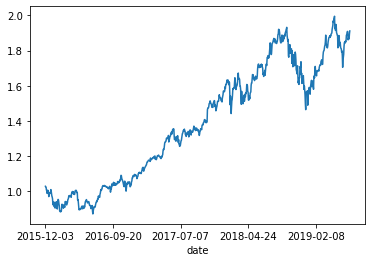

In [12]:
# Plot
Cumulative_returns_daily['Portfolio_Daily_Return'].plot()

### Portfolio Risk – Portfolio Standard Deviation

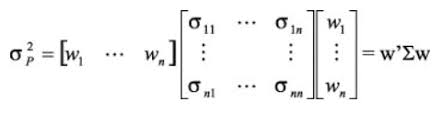

By looking into the portfolio standard deviation formula, we need three elements:
- Portfolio weight array
- Portfolio covariance matrix
- Transpose of portfolio weight array

The weight for each stock in the portfolio is already abailable. We need to calculate the daily covariance. Remember, the covariance must be annualised by **multiplying with 252 (the trading days in a year)**.

In [13]:
# Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = return_stocks.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

,AAPL,MSFT,GOOG
AAPL,0.060617,0.033186,0.031983
MSFT,0.033186,0.050520,0.036766
GOOG,0.031983,0.036766,0.049668


In [15]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))

In [16]:
# Standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.20105342577539775

### Sharpe Ratio

In [17]:
# Assuming that the risk free rate is zero
Sharpe_Ratio = return_stocks['Portfolio_Daily_Return'].mean() / return_stocks['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.06326386811678758

In [18]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
Annualised_Sharpe_Ratio

1.0042827720780485